In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as ts

# 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 T-shirt/top


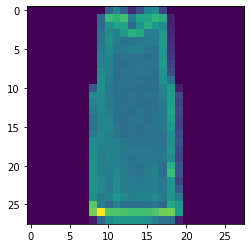

In [6]:
n = 9487
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n])


# 欣賞數據集內容

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
len(x_train),len(x_test)

(60000, 10000)

In [9]:
x_train[240]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,  39,  85,
         90, 102, 118,  66,  50,   0,   0,   1,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   3,   0,  14, 108, 151, 173,
        149, 141, 208, 158, 183,  85,   0,   0,   1,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   1,   0,   0, 139, 132, 115, 133,
         88,  85, 136, 120, 153, 200,  48,   0,   5,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   3,   0,  51, 224,  75,  69,  94,
        110,  75,  95, 130, 103, 147, 132,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 125, 208, 161, 117, 163,
        199, 244, 166, 131, 119, 136, 210,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 160, 201, 201, 208, 213, 190,
        104, 255, 135, 177, 184, 197, 200, 211,  58,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
28*28

784

# 資料整理

In [11]:
x_train = x_train.reshape(60000,784)/255
x_test = x_test.reshape(10000,784)/255

### 將資料存為one-hot encoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train =  to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 打造神經網路

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import SGD 

In [15]:
model = Sequential()
model.add(Dense(87, input_dim=784, activation="relu")) 
model.add(Dense(87, activation="relu")) 
model.add(Dense(10, activation="softmax")) 
model.compile(loss='mse' , optimizer=SGD(lr=0.08) , metrics=['accuracy']) 

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train, y_train, batch_size=100, epochs=15)

Train on 60000 samples
Epoch 1/15
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0755 - accuracy: 0.4173
Epoch 2/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0477 - accuracy: 0.6733
Epoch 3/15
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0382 - accuracy: 0.7449
Epoch 4/15
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0334 - accuracy: 0.7864
Epoch 5/15
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0304 - accuracy: 0.8048
Epoch 6/15
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0285 - accuracy: 0.8147
Epoch 7/15
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0272 - accuracy: 0.8208
Epoch 8/15
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0262 - accuracy: 0.8267
Epoch 9/15
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0255 - accuracy: 0.8298
Epoch 10/15
60

### 準確率並不算太高 進行第二次訓練, batch_size增加為150,epoch增加為40

In [18]:
model.fit(x_train, y_train, batch_size=150, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0225 - accuracy: 0.8483
Epoch 2/40
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0224 - accuracy: 0.8487
Epoch 3/40
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0222 - accuracy: 0.8505
Epoch 4/40
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0220 - accuracy: 0.8511
Epoch 5/40
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0219 - accuracy: 0.8518
Epoch 6/40
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0217 - accuracy: 0.8538
Epoch 7/40
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0216 - accuracy: 0.8537
Epoch 8/40
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0215 - accuracy: 0.8555
Epoch 9/40
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0213 - accuracy: 0.8565
Epoch 10/40
60

#### 增加回合數後,準確率提升為0.8766,但並沒有提升太多....

# 訓練成果

In [19]:
result = model.predict_classes(x_test)

神經網路預測是: Coat


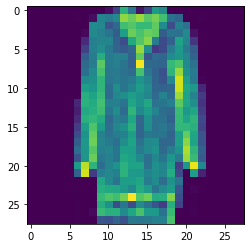

In [20]:
n = 9487
print('神經網路預測是:',class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28))

### 試試看另一種訓練, batch_size增加為200,epoch增加為40, learn rate變為0.095

In [29]:
model2 = Sequential()
model2.add(Dense(87, input_dim=784, activation="relu")) 
model2.add(Dense(87, activation="relu")) 
model2.add(Dense(10, activation="softmax")) 
model2.compile(loss='mse' , optimizer=SGD(lr=0.095) , metrics=['accuracy']) 

In [30]:
model2.fit(x_train, y_train, batch_size=200, epochs=40)

Train on 60000 samples
Epoch 1/40
60000/60000 [==============================] - 1s 18us/sample - loss: 0.0797 - accuracy: 0.4121
Epoch 2/40
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0566 - accuracy: 0.6460
Epoch 3/40
60000/60000 [==============================] - 1s 19us/sample - loss: 0.0464 - accuracy: 0.6833
Epoch 4/40
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0421 - accuracy: 0.7182
Epoch 5/40
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0381 - accuracy: 0.7447
Epoch 6/40
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0347 - accuracy: 0.7678
Epoch 7/40
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0325 - accuracy: 0.7849
Epoch 8/40
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0309 - accuracy: 0.7978
Epoch 9/40
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0296 - accuracy: 0.8065
Epoch 10/40
60

#### 唉呦 準確率更低....